<a href="https://colab.research.google.com/github/etnarojasflores/DataScienceClass/blob/main/EDA/EDA_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio y Preparación de Datos
## TC 2031 Ciencia de Datos
## @etnarojas


- Objetivo:
   
    - Mostrar lo que se hace cuando se hace un análisis exploratorio de los datos y se preparan para poder usarlos para hacer análisis o modelos.
    - En proyectos reales entre el 50% y 80% del tiempo se emplea en tareas de preparación de los datos para empezar a modelar
    
  
- Librerías de Python usadas:
    - pandas
    - Matplotlib
    - Numpy
   

Dataset para el ejemplo tomado de : https://archive.ics.uci.edu/ml/datasets/Adult

1. Limpieza de Datos
    1. Manejo de diferentes tipos de datos 
    2. Manejo de datos faltantes
2. Exploración de los Datos
    1. Descripción de los datos
    2. Gráficas de las distribuciones de los Datos
    3. Detección de valores atípicos
3. Creando los Datos para hacer el Modelo
    1. Relaciones entre variables
    2. Selección de variables

## Modelo

Un modelo que dados los atributos sobre una persona haga una predicción para saber s si su ingreso es <= 50000 o > 50000 Dlls

## Datos
### Una descripción del tipo de dato y que representa 

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.represents final weight, which is the number of units in the target population that the responding unit represents
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.7



In [3]:
# Importando librerías y datos
import numpy as np
import pandas as pd

df = pd.read_csv('adult.csv',na_values=['#NAME?'])

In [4]:
print(df.head(5))


    age         workclass    fnlwgt  ... hours_per_week  native_country income
0  39.0         State-gov   77516.0  ...             40   United-States  <=50K
1  50.0  Self-emp-not-inc   83311.0  ...             13   United-States  <=50K
2  38.0           Private  215646.0  ...             40   United-States  <=50K
3  53.0           Private  234721.0  ...             40   United-States  <=50K
4  28.0           Private  338409.0  ...             40            Cuba  <=50K

[5 rows x 15 columns]


In [5]:
df.shape

(5000, 15)

In [6]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [7]:
type(df['education'][0])

str

In [8]:
# Ver la variable 'income' el tipo y cuantos hay de cada tipo
print(df['income'].value_counts())

<=50K    3779
>50K     1221
Name: income, dtype: int64


In [10]:
# Asignar el valor de 0 Si income <=50K y de 1 Si 1 income >50K
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]

# Crear dos DataFrames X con variables indpendientes o features y uno y con variable dependiente , la que vamos a predecir
X = df.drop('income', 1)
y = df.income

In [11]:
print(X.head(5))

    age         workclass  ...  hours_per_week native_country
0  39.0         State-gov  ...              40  United-States
1  50.0  Self-emp-not-inc  ...              13  United-States
2  38.0           Private  ...              40  United-States
3  53.0           Private  ...              40  United-States
4  28.0           Private  ...              40           Cuba

[5 rows x 14 columns]


In [12]:
print(y.head(5))

0    1
1    1
2    1
3    1
4    1
Name: income, dtype: int64


## 1. Limpieza de Datos

### A. Manejo de diferentes tipos de datos 

- Hay tres tipos principales de datos:
    - Cuantitativo, Numérico: ingreso, edad
    - Cualitativo, Categórico:  género, nacionalidad
    - Cualitativo, Categórico Ordinal: bajo medio alto
    
- Los modelos sólo pueden manejar variables cuantitativas numéricas
- Se deben convertir las variables cualitativas ó categóricas en variables numéricas
    - Crear variables extra
    - Transformar una variable cualitativa o categórica en un conjunto de variables extra, cada una representando una categoría única
    - En el conjunto de variables extra, 1 indica que la observación pertenece a esa categoría
    

In [14]:
# Education es una variable cualitativa
print(X['education'].head(20))

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
5          Masters
6              9th
7          HS-grad
8          Masters
9        Bachelors
10    Some-college
11       Bachelors
12       Bachelors
13      Assoc-acdm
14       Assoc-voc
15         7th-8th
16         HS-grad
17         HS-grad
18            11th
19         Masters
Name: education, dtype: object


In [15]:
# Ver las caterorías de las variables categoricas o cualitativas

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print('Variable ''{col_name} tiene {unique_cat} categorías'.format(col_name=col_name, unique_cat=unique_cat))


Variable workclass tiene 8 categorías
Variable education tiene 17 categorías
Variable marital_status tiene 7 categorías
Variable occupation tiene 15 categorías
Variable relationship tiene 6 categorías
Variable race tiene 6 categorías
Variable sex tiene 3 categorías
Variable native_country tiene 40 categorías


In [16]:
# Use get_dummies de pandas para crear las variables dummies extra para representar a las variable cualitativa como numéricas
# Otra opción es usar  OneHotEncoder de la librería:  sci-kit learn
print(pd.get_dummies(X['education']).head(5))

   10th  11th  12th  1st-4th  ...  Masters  Preschool  Prof-school  Some-college
0     0     0     0        0  ...        0          0            0             0
1     0     0     0        0  ...        0          0            0             0
2     0     0     0        0  ...        0          0            0             0
3     0     1     0        0  ...        0          0            0             0
4     0     0     0        0  ...        0          0            0             0

[5 rows x 17 columns]


In [17]:
# Para ver las categorías de 'native_country' y vemos que es dominante la de Unites States
print(X['native_country'].value_counts().sort_values(ascending=False).head(10))

United-States    4465
Mexico            104
?                  97
Canada             28
Philippines        22
Germany            22
England            16
El-Salvador        16
Puerto-Rico        16
China              15
Name: native_country, dtype: int64


In [21]:
# Podemos hacer que la baja frecuencia de las otras queden clasificadas como "Other"
X['native_country'] = ['United-States ' if x == 'United-States' else 'Other' for x in X['native_country']]

print(X['native_country'].value_counts().sort_values(ascending=False))

Other    5000
Name: native_country, dtype: int64


In [26]:
# Crear toda la lista de variables categóricas para transformarlas a numéricas
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [22]:
# Función para llamar get dummies c
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [27]:
X = dummy_df(X, todummy_list)
print(X.head(5))

    age    fnlwgt  education_num  ...  sex_Female  sex_Male  native_country_Other
0  39.0   77516.0           13.0  ...           0         1                     1
1  50.0   83311.0           13.0  ...           0         1                     1
2  38.0  215646.0            9.0  ...           0         1                     1
3  53.0  234721.0            7.0  ...           0         0                     1
4  28.0  338409.0           13.0  ...           1         0                     1

[5 rows x 67 columns]


### B. Manejo de datos faltantes

- Los modelos no pueden manejar datos faltantes


- La solución más simple
    - Eliminar observaciones / características que tienen datos faltantes
    

- Pero, eliminar datos faltantes puede presentar muchos problemas
    - Datos faltantes están distribuidos al azar y son muchos : posiblemente pierda muchos de sus datos
    - Datos faltantes no están distribuidos al azar y son muchos : además de perder datos, también está introduciendo posibles sesgos


- Una solución alternativa es utilizar la imputación.
    - Reemplace el valor faltante con otro valor
    - Estrategias: media, mediana, valor de frecuencia más alta de una variable dada
    
  

In [43]:
# Cuantos son datos faltantes?
X.isnull().sum().sort_values(ascending=False).head()

native_country_Other      0
education_12th            0
education_Some-college    0
education_Prof-school     0
education_Preschool       0
dtype: int64

In [41]:
# Para Imputar / Reemplazar los valores faltantes se usa Imputer de sklearn.preprocessing
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

In [42]:
#Ahora volvemos a verificar como los nulos se han reemplazado con un valor
X.isnull().sum().sort_values(ascending=False).head()

native_country_Other      0
education_12th            0
education_Some-college    0
education_Prof-school     0
education_Preschool       0
dtype: int64

## 2. Exploration de los Datos
- Entender el problema y los datos es extremadamente importante para construir modelos
- Se hace lo que se conoce como Análisis Exploratorio de los Datos para explorar sus datos entenderlos y tomar mejores decisiones al modelar

### A.Descripción de los Datos

In [46]:
X.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_?,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,38.571200,1.907303e+05,10.079400,1033.640200,93.696800,40.519000,0.066200,0.029200,0.065800,0.687000,0.036400,0.076600,0.038600,0.000200,0.028800,0.039600,0.011000,0.004400,0.008600,0.019600,0.014800,0.011400,0.032600,0.043000,0.163800,0.011000,0.319400,0.050200,0.001400,0.017600,0.222800,0.136400,0.00100,0.454000,0.013200,0.331800,0.03160,0.032000,0.066200,0.115200,0.000400,0.123800,0.123600,0.028600,0.03920,0.062400,0.099000,0.003600,0.125000,0.018000,0.117600,0.028000,0.049400,0.400200,0.258400,0.029600,0.154000,0.108800,0.04900,0.009600,0.029000,0.098600,0.005800,0.804200,0.324200,0.666400,1.0
std,13.517776,1.054410e+05,2.520787,7051.802077,410.801418,12.109193,0.248656,0.168384,0.247957,0.463761,0.187302,0.265982,0.192659,0.014142,0.167261,0.195037,0.104313,0.066193,0.092346,0.138635,0.120764,0.106171,0.177605,0.202877,0.370131,0.104313,0.466291,0.218379,0.037394,0.131506,0.416167,0.343247,0.03161,0.497929,0.114142,0.470907,0.17495,0.176018,0.248656,0.319295,0.019998,0.329386,0.329158,0.166696,0.19409,0.241905,0.298692,0.059898,0.330752,0.132964,0.322166,0.164989,0.216723,0.489988,0.437799,0.169498,0.360985,0.311419,0.21589,0.097518,0.167823,0.298154,0.075944,0.396855,0.468122,0.471546,0.0
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


### B.Gráficas de las distribuciones de los Datos

In [47]:
# Use pyplot de matplotlib para hacer histograms
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title('Histogram of ''{var_name}'.format(var_name=x.name))
    plt.xlabel('Value')
    plt.ylabel('Frecuency')
    plt.show()

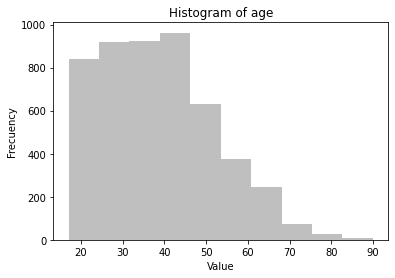

In [50]:
plot_histogram(X['age'])

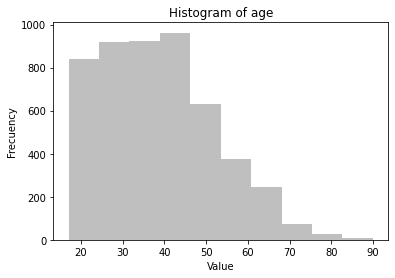

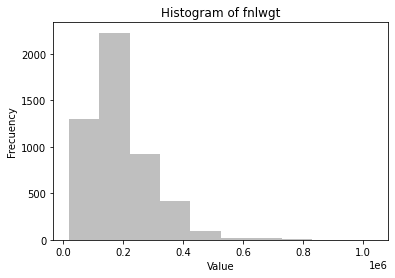

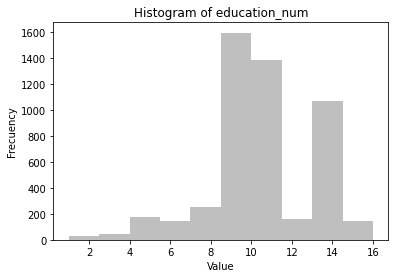

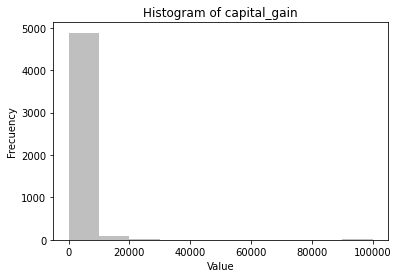

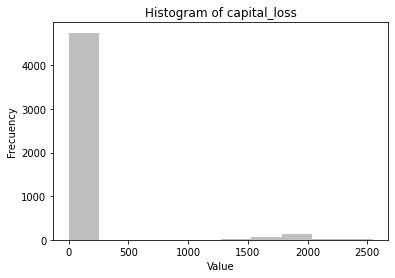

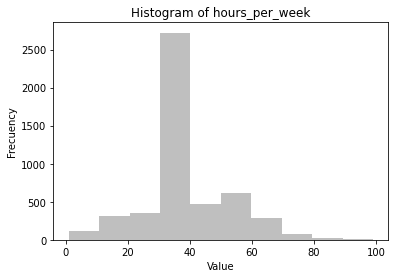

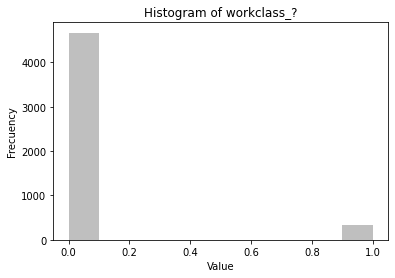

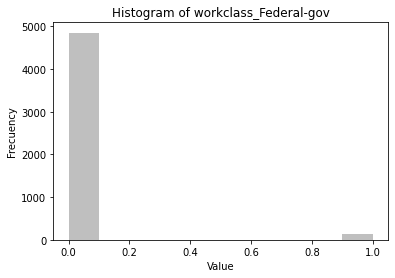

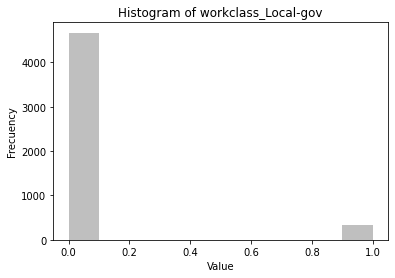

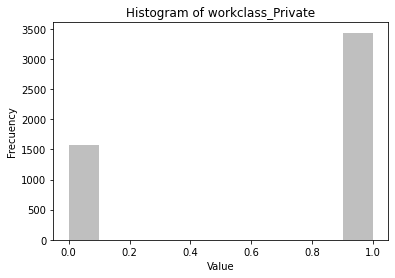

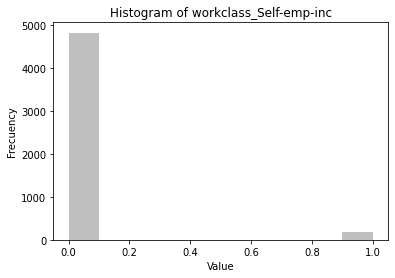

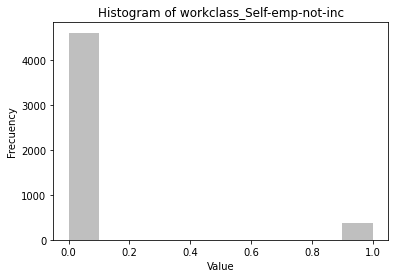

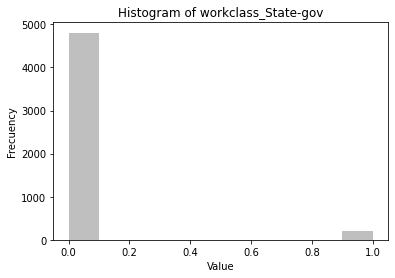

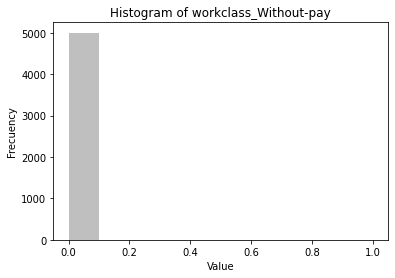

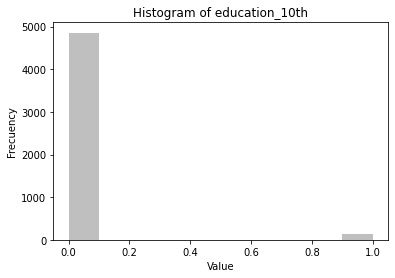

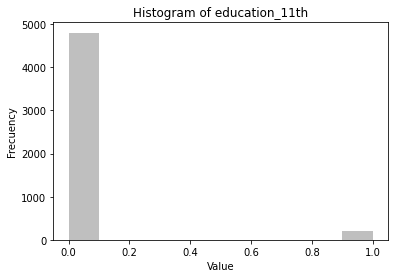

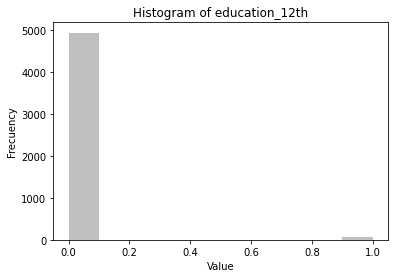

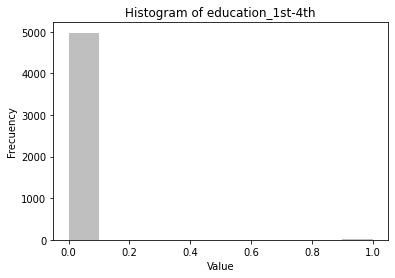

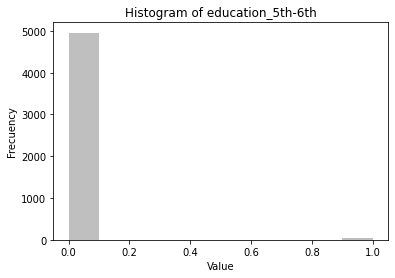

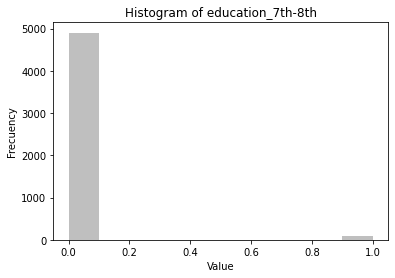

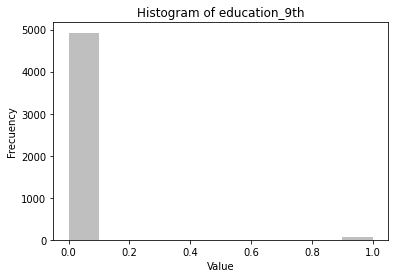

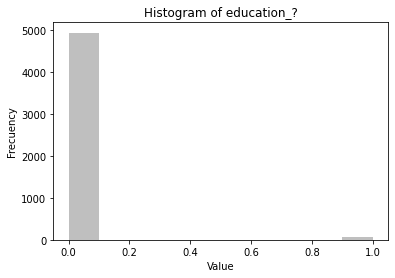

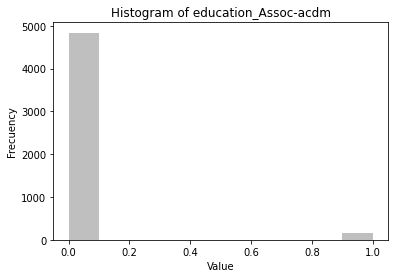

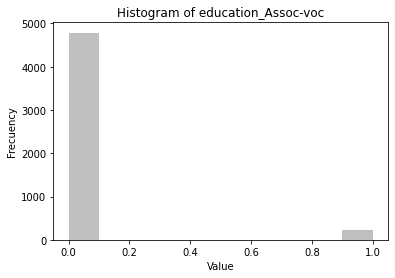

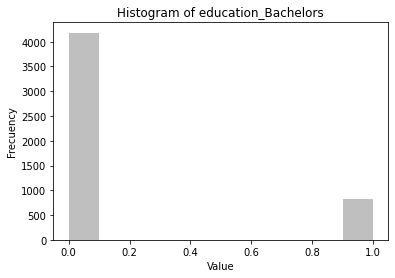

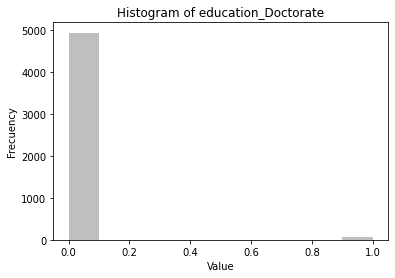

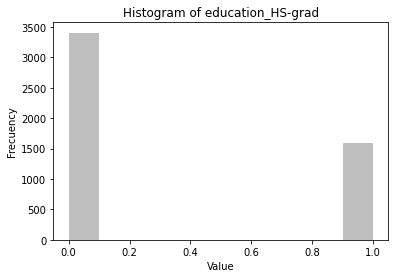

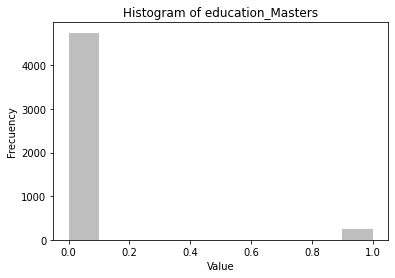

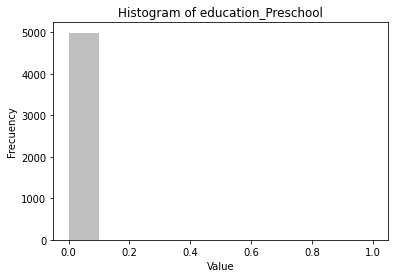

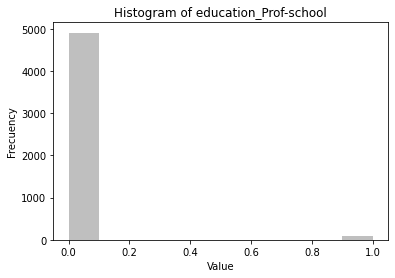

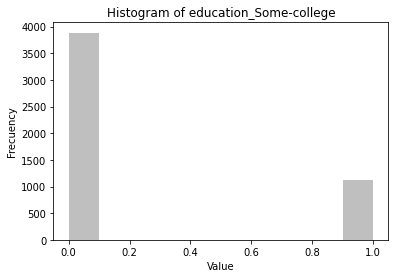

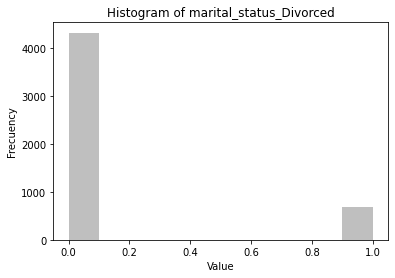

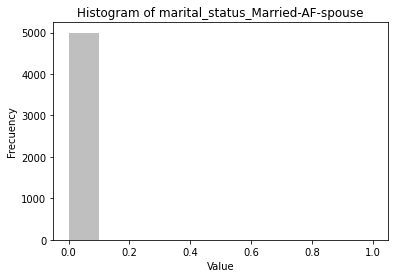

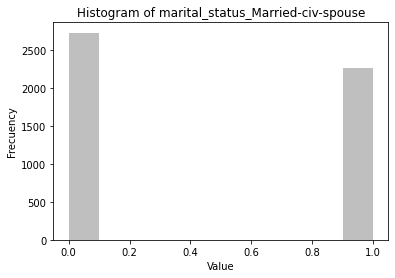

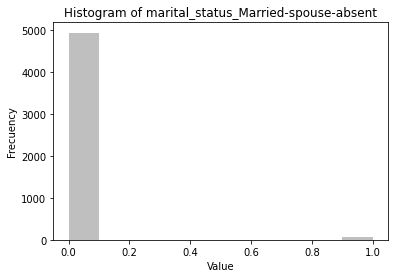

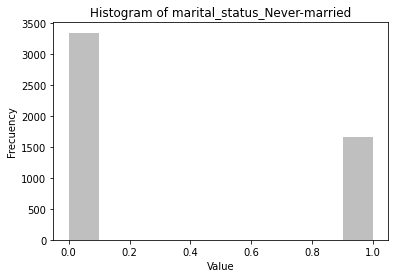

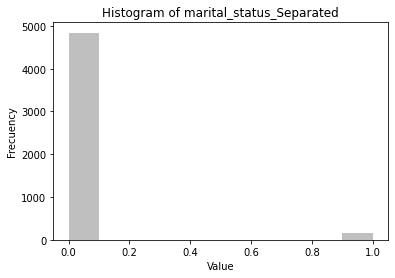

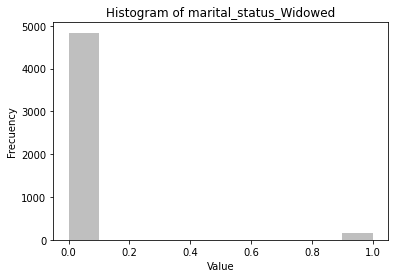

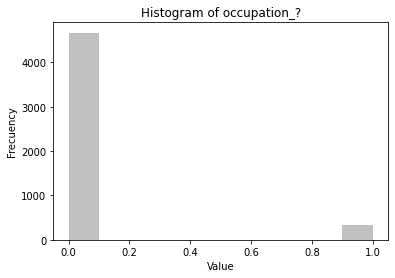

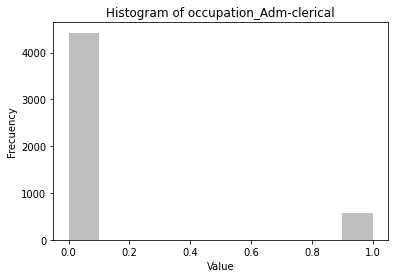

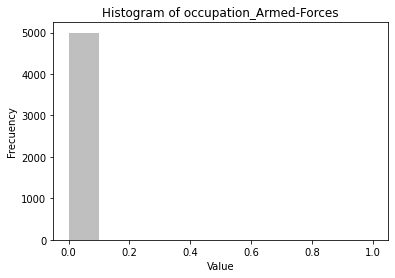

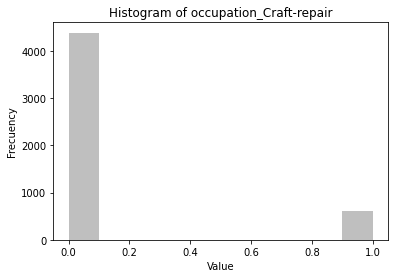

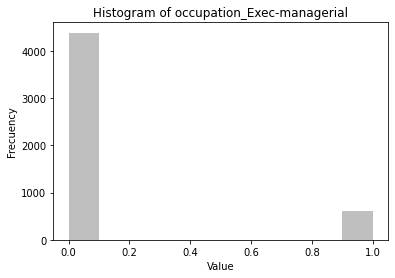

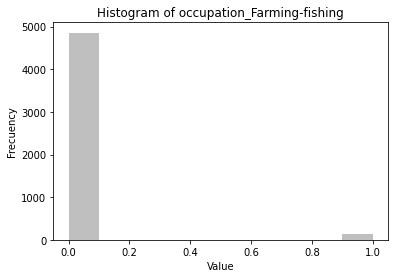

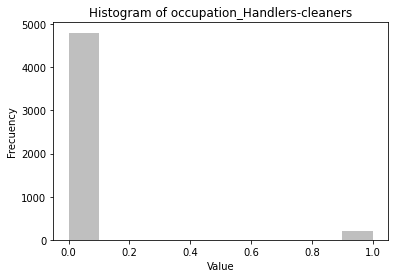

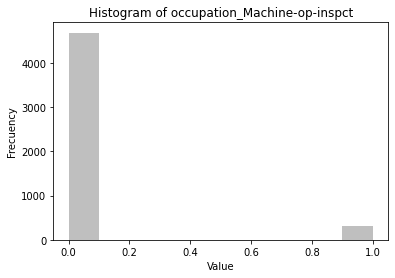

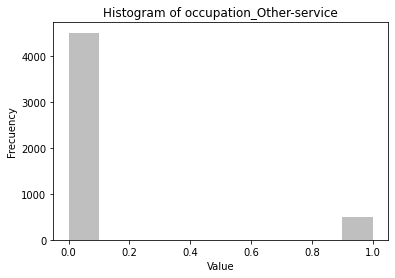

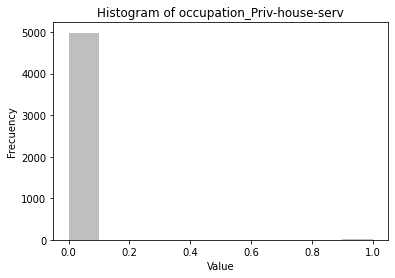

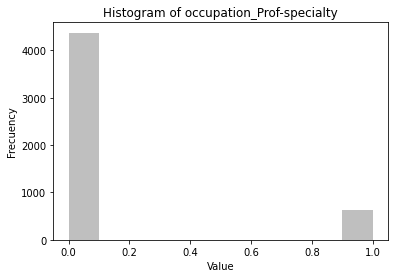

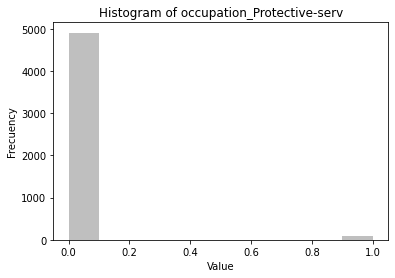

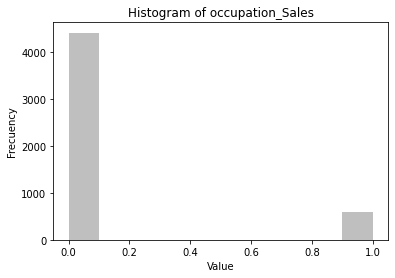

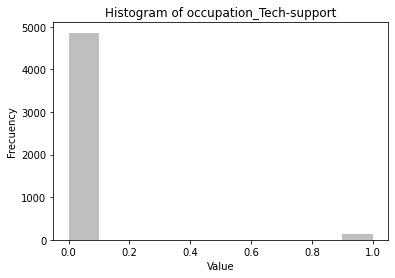

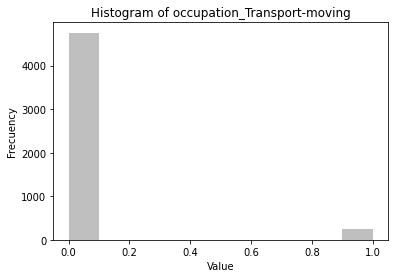

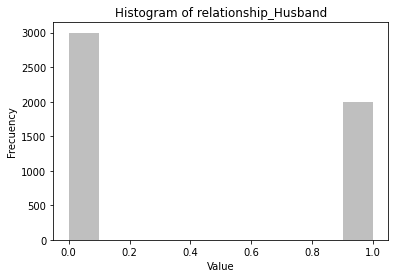

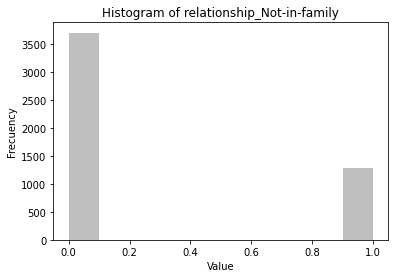

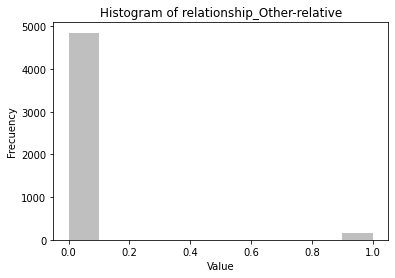

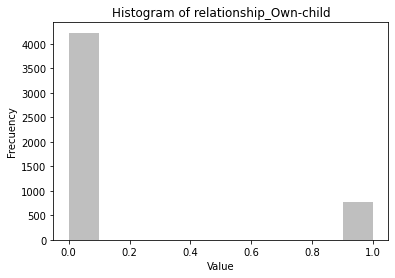

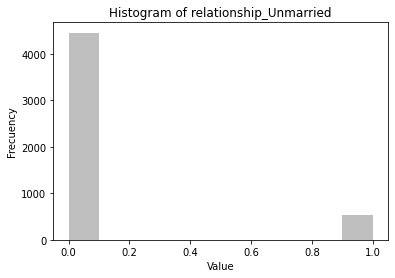

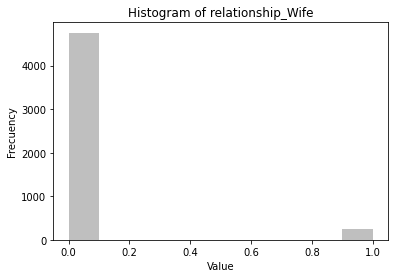

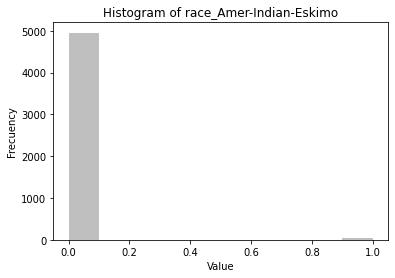

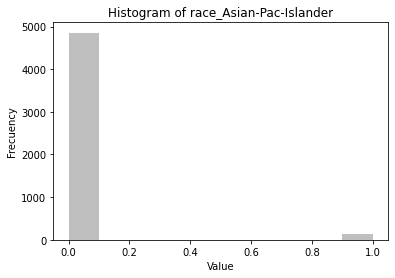

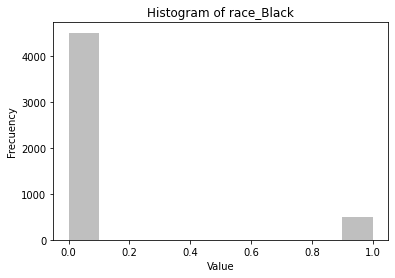

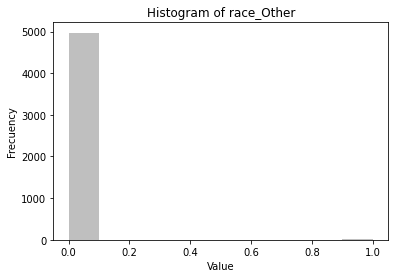

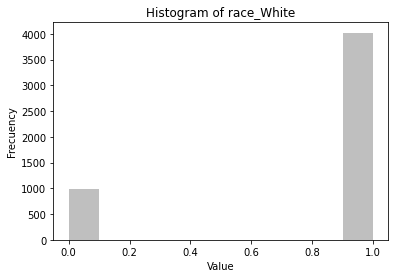

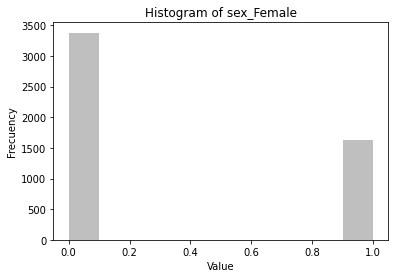

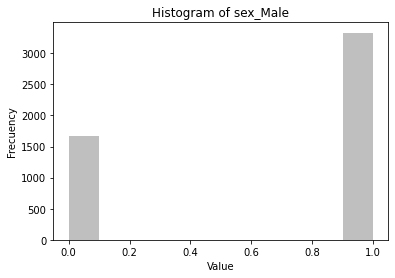

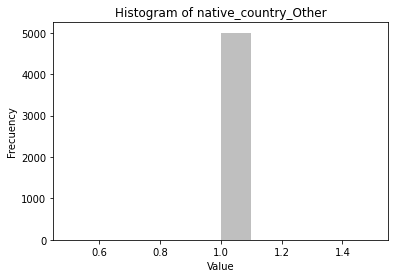

In [51]:
for col_name in X.columns:
    plot_histogram(X[col_name])
    

### C. Detección de valores atípicos

- Un valor atípico es una observación que se desvía drásticamente de otras observaciones en un conjunto de datos


- Ocurrencia:
    - Natural, por ejemplo Ingresos de Millonarios
    - Error, por ejemplo peso humano de 5,00 kg. debido al error de escritura adicional 0

- ¿Por qué son problemáticos?
    - Si ocurren naturalmente
        - No necesariamente problemático
        - Pero pueden sesgar su modelo
    - Error 
        - Indicativo de problemas de calidad de datos.
        - Tratar de la misma manera como un valor faltante, es decir, usar la imputación
   
   
- ¿Cómo se detectan?
    - Visualizaciones Box Plot



 ### Detección de valores atípicos - Usando Box Plots
- Identifica valores extremos en los datos.
- Los valores atípicos se definen como:
    - Valores inferiores a Q1-1.5 (Q3-Q1) o superiores a Q3 + 1.5 (Q3-Q1)

 

In [ ]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [ ]:
from IPython.display import Image
Image(filename='outliers_boxplot.jpg')
# Imagine taken from: 
# http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

In [ ]:
from IPython.display import Image
Image(filename='outliers.jpg')

## 3. Creando los Datos para hacer el Modelo

### A. Relaciones entre variables

- La variables independientes pueden estar correlacionadas y en ocasiones hay modelos como las regersiones que no permiten isar variables correlacionadas porque se afecta el resultado.

- Fecha de Nacimiento y Edad tienen una relación entre ellas y hay que decidir cual usar.
- No siempre es evidente esta relación entre las variables




In [ ]:
# Puedes analizar una matriz de correlaciones de todas las variables
X.corr()

### B. Selección de Variables


In [ ]:
# Al agregar variable dummies por variables categóricas se incrementó el número de variables
print(df.shape)
print(X.shape)

In [ ]:
# Usar train_test_split in sklearn.cross_validation para partir los datos en dos set de enternamiento y de testeo
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)


In [ ]:

# Usar el  método feature selection para seleccionar las varuables más significativas
import sklearn.feature_selection


select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]


In [ ]:
print(colnames_selected)

In [ ]:
print(len(colnames_selected))